# Visualisasi Data - Pima Diabetes Dataset

In [1]:
# lib manipulasi data
import pandas as pd
import numpy as np

# lib visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LinearRegression
from plotnine import ggplot, aes, geom_point, labs

In [3]:
dataset = pd.read_csv("../Dataset/dataset_diabetes.csv")
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [4]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
df = pd.DataFrame(dataset)
print(df.head(1)), (df.tail(1))

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  


(None,
      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 767            1       93             70             31        0  30.4   
 
      DiabetesPedigreeFunction  Age  Outcome  
 767                     0.315   23        0  )

In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
# Menampilkan jumlah data
df = dataset["Age"].value_counts().reset_index()
df

,Age,count
0,22,72
1,21,63
2,25,48
3,24,46
4,23,38
5,28,35
6,26,33
7,27,32
8,29,29
9,31,24


In [8]:
# Menampilkan jumlah data
df = dataset["Outcome"].value_counts().rename('Count_Outcome').reset_index()

# df.rename({'count': 'count_Outcome'}, axis='columns')
print(df)

   Outcome  Count_Outcome
0        0            500
1        1            268


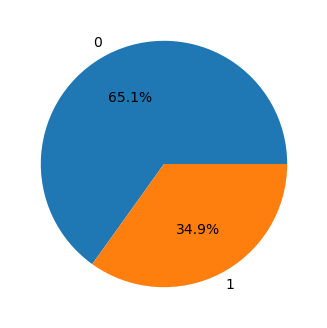

In [9]:
# Membuat bingkai
fig, ax = plt.subplots(figsize=(8,4))

# Membuat barplot plt
plt.pie(x=df["Count_Outcome"], labels=df["Outcome"], autopct='%1.1f%%')

# Set labels
# ax.set_title("Barplot Iris Flowers", fontsize=14)
# ax.set_xlabel("Species", fontsize=12)
# ax.set_ylabel("Jumlah Data", fontsize=12)
# ax.grid(True)

# Menampilkan data
plt.show()

In [10]:
df.corr = dataset.corr(numeric_only=True, method="pearson")
df.corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


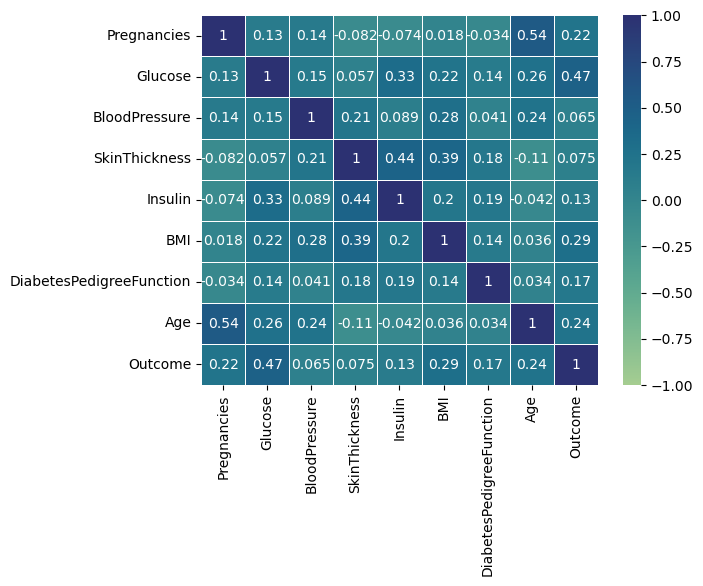

In [11]:
#correlation
corr = df.corr

plt.figure(dpi=100)
sns.heatmap(data=corr, vmin=-1, vmax=1, cmap="crest", annot=True, fmt='.2g', linewidths=0.5, linecolor="white")
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_6028\758257905.py:6: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


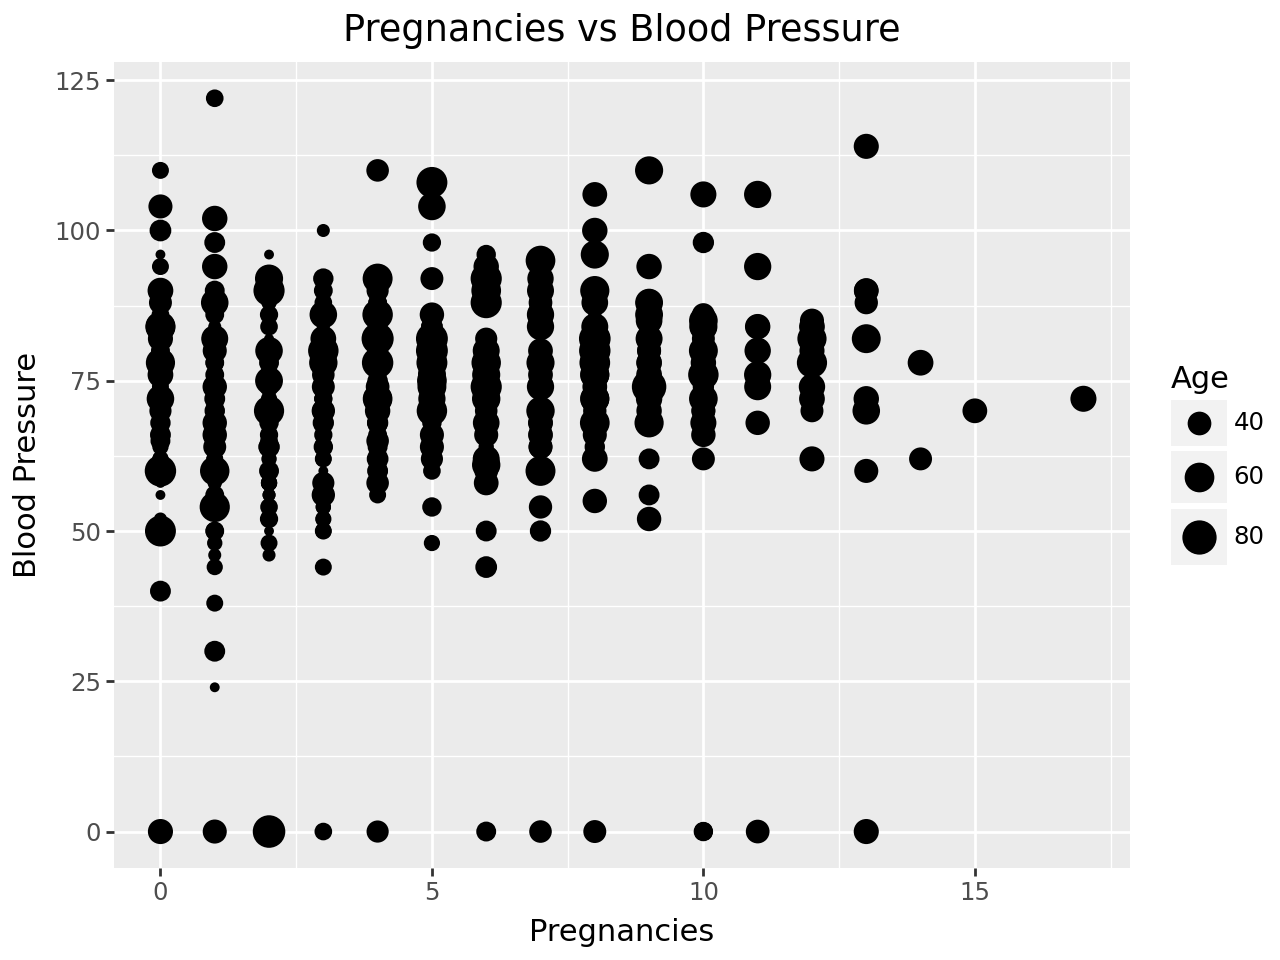

In [12]:
plot = (ggplot(data=dataset, mapping=aes(x='Pregnancies', y='BloodPressure', size='Age'))
        + geom_point()
        + labs(title='Pregnancies vs Blood Pressure', x='Pregnancies', y='Blood Pressure'))

# Tampilkan plot
print(plot)

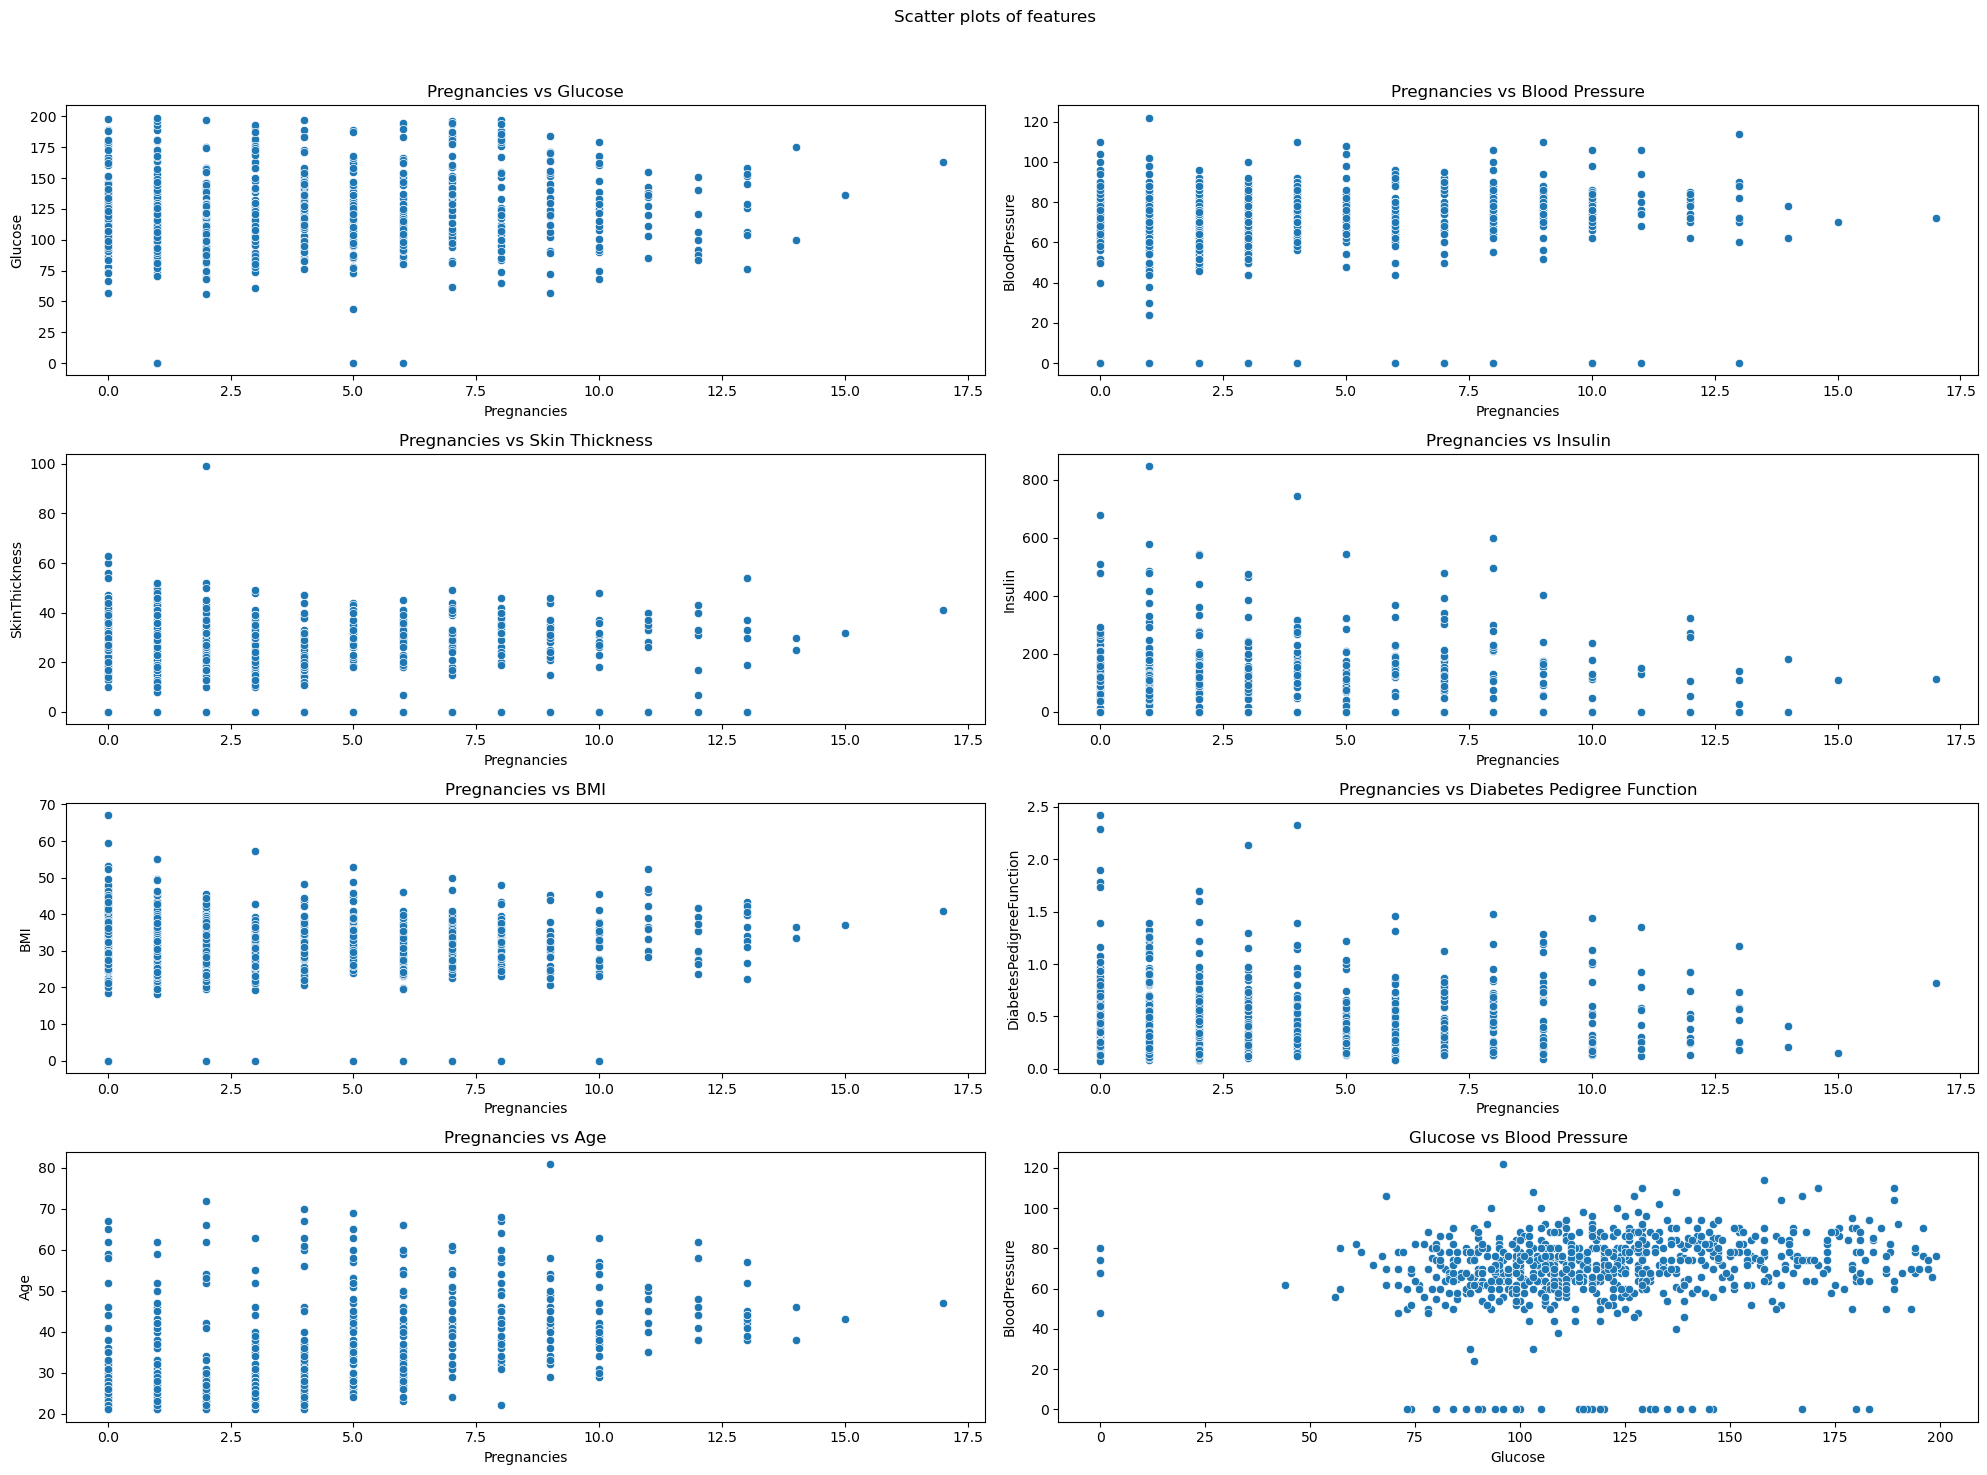

In [13]:
# Datasetnya
# dataset = pd.read_csv('path_to_your_dataset.csv')  # Sesuaikan jika dataset di-load dari file

# Scatter plots of features
def scatter(ax, axis, x_feature, y_feature, title):
    sns.scatterplot(data=dataset, x=x_feature, y=y_feature, ax=ax[axis[0], axis[1]])
    ax[axis[0], axis[1]].set_title(title)

f, ax = plt.subplots(4, 2, figsize=(20, 15))
plt.suptitle("Scatter plots of features")

# Memetakan x dan y untuk setiap plot dengan nama fitur yang sesuai
features = [
    ((0, 0), "Pregnancies", "Glucose", "Pregnancies vs Glucose"),
    ((0, 1), "Pregnancies", "BloodPressure", "Pregnancies vs Blood Pressure"),
    ((1, 0), "Pregnancies", "SkinThickness", "Pregnancies vs Skin Thickness"),
    ((1, 1), "Pregnancies", "Insulin", "Pregnancies vs Insulin"),
    ((2, 0), "Pregnancies", "BMI", "Pregnancies vs BMI"),
    ((2, 1), "Pregnancies", "DiabetesPedigreeFunction", "Pregnancies vs Diabetes Pedigree Function"),
    ((3, 0), "Pregnancies", "Age", "Pregnancies vs Age"),
    ((3, 1), "Glucose", "BloodPressure", "Glucose vs Blood Pressure")
]

for axis, x_feature, y_feature, title in features:
    scatter(ax, axis, x_feature, y_feature, title)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


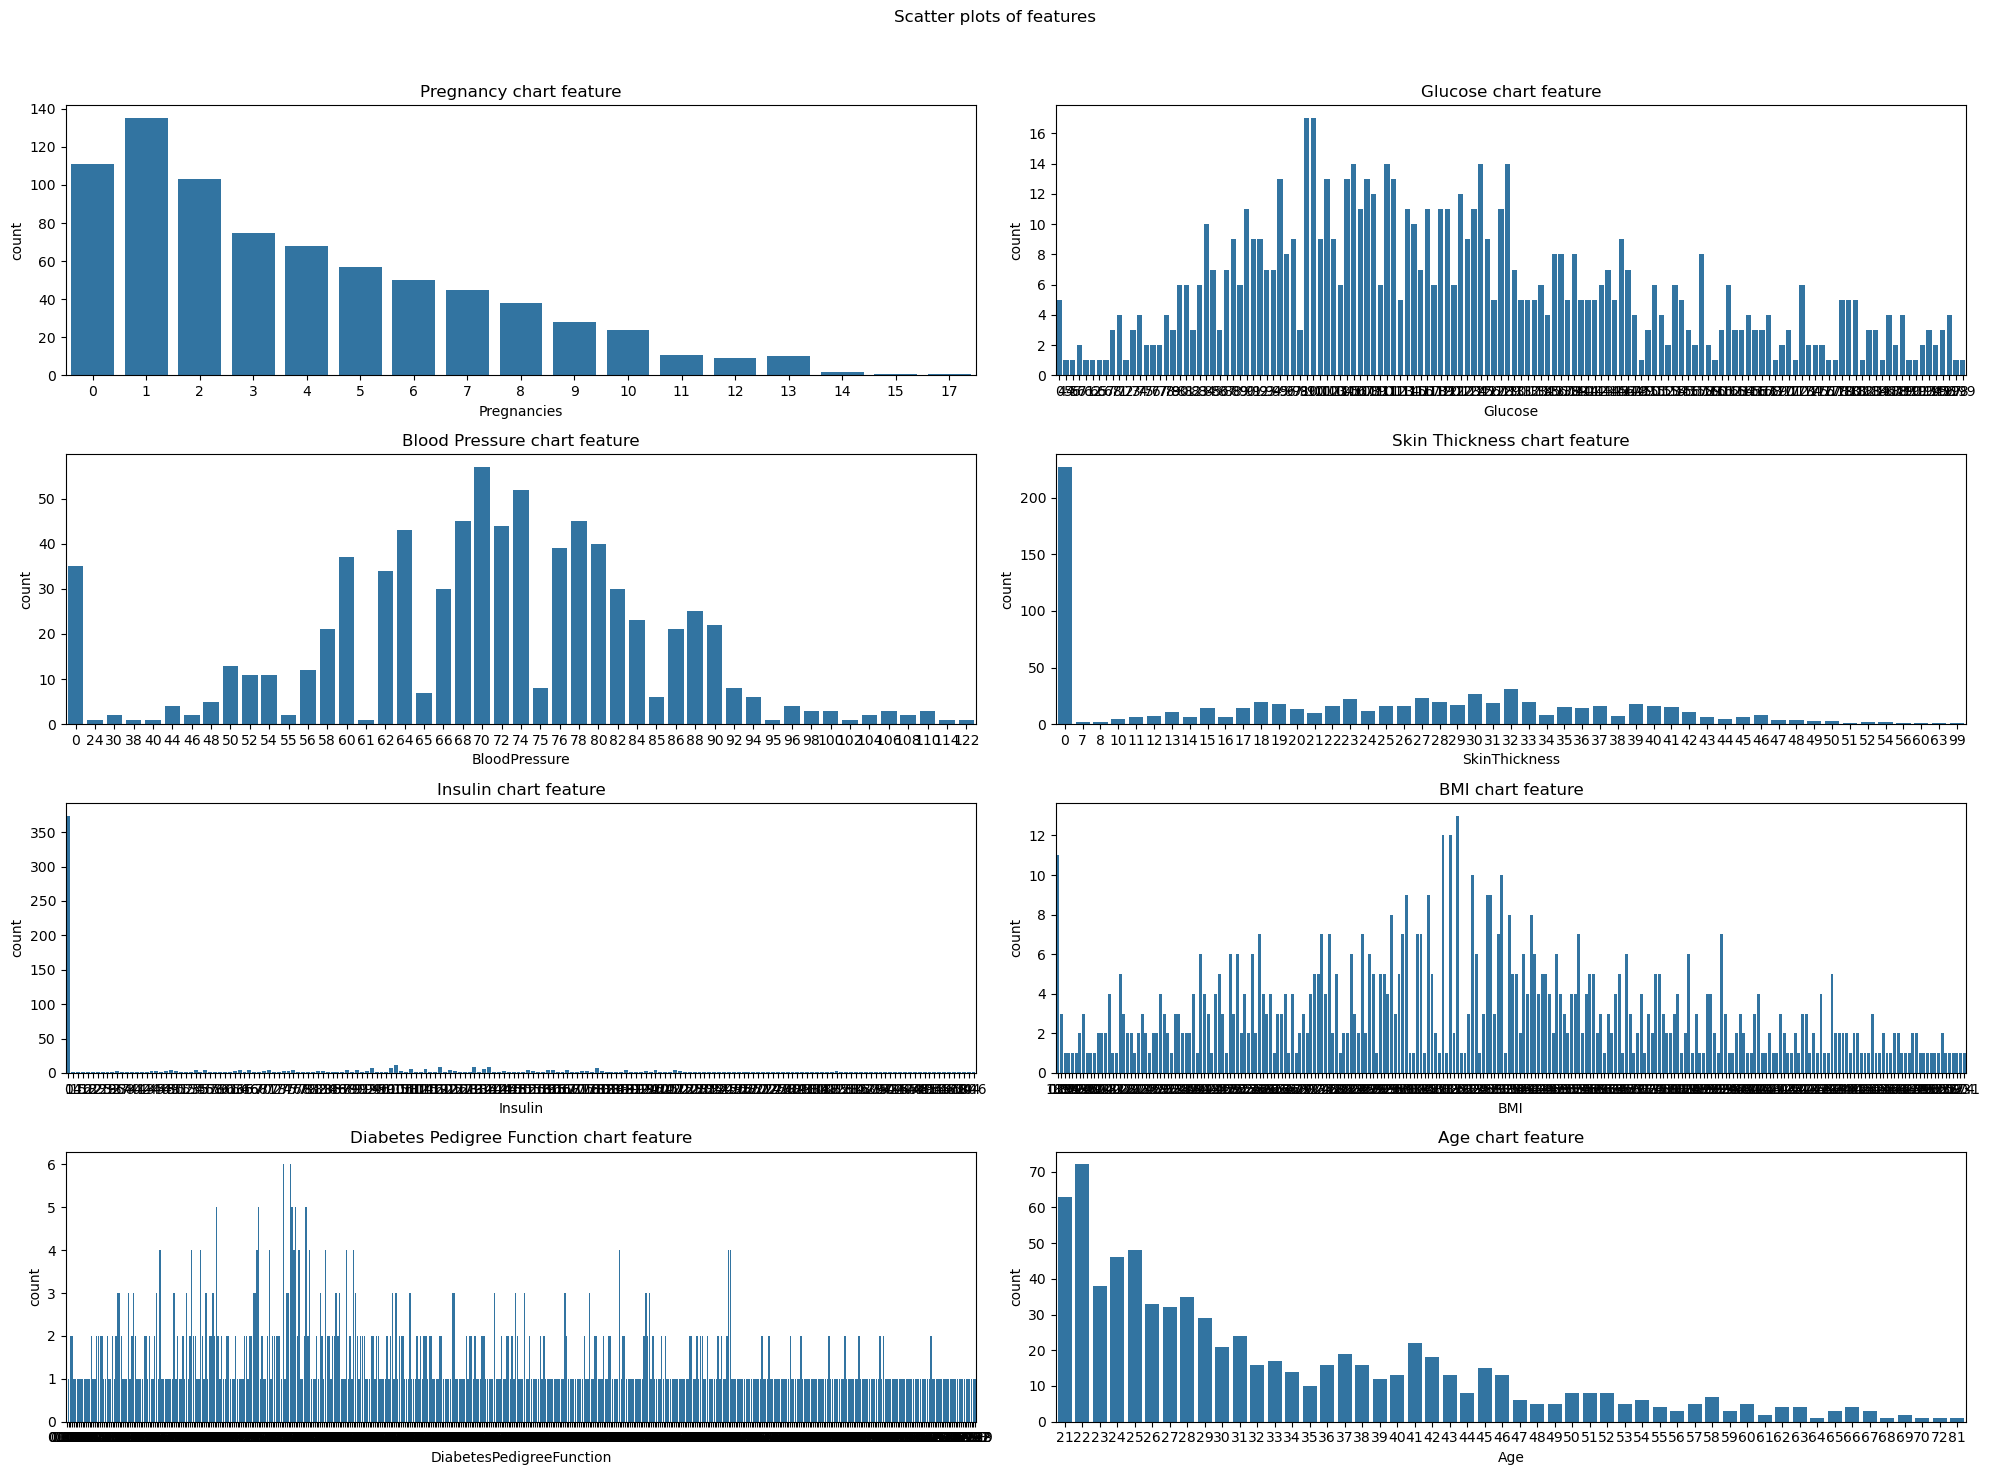

In [14]:
# Dataset ya (gunakan dataset yang sesuai)
# dataset = pd.read_csv('path_to_your_dataset.csv')  # Sesuaikan jika dataset di-load dari file

# Scatter plots of features
def scatter(ax, axis, feature, title):
    sns.countplot(data=dataset, x=feature, ax=ax[axis[0], axis[1]])
    ax[axis[0], axis[1]].set_title(title)

f, ax = plt.subplots(4, 2, figsize=(20, 15))
plt.suptitle("Scatter plots of features")

features = [
    ((0, 0), "Pregnancies", "Pregnancy chart feature"),
    ((0, 1), "Glucose", "Glucose chart feature"),
    ((1, 0), "BloodPressure", "Blood Pressure chart feature"),
    ((1, 1), "SkinThickness", "Skin Thickness chart feature"),
    ((2, 0), "Insulin", "Insulin chart feature"),
    ((2, 1), "BMI", "BMI chart feature"),
    ((3, 0), "DiabetesPedigreeFunction", "Diabetes Pedigree Function chart feature"),
    ((3, 1), "Age", "Age chart feature")
]

for axis, feature, title in features:
    scatter(ax, axis, feature, title)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
